In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
# %timeit sirve para evaluar el tiempo de ejecucion
df_vistas = pd.read_csv("fiuba_3_vistas.csv")
df_postulaciones = pd.read_csv("fiuba_4_postulaciones.csv")

In [3]:
df_postulaciones['fechapostulacion'] = pd.to_datetime(df_postulaciones['fechapostulacion'], errors='coerce')

Unifico para que tanto las vistas como las postulaciones esten en el mismo tipo de datos, para poder calcular el delta entre el momento en que se postula, con la primera vez que vio el aviso

In [4]:
df_vistas['timestamp1'] = pd.to_datetime(df_vistas['timestamp'], errors='coerce')

Remuevo aquellos en los que se accede a la vista una vez postulado

In [5]:
aux = pd.merge(df_vistas,df_postulaciones,left_on=['idAviso','idpostulante'],right_on=['idaviso','idpostulante'],how='inner')
temp = aux[aux["timestamp1"]<aux["fechapostulacion"]]

Calculo los deltas, cada 5 minutos y Me quedo solo con la primera vez que veo al aviso.

In [6]:
temp["delta"] = (temp['fechapostulacion']-temp['timestamp1']).dt.round('5min')
tmp = temp.drop_duplicates(['idpostulante','idaviso'],keep='first').groupby('delta').size()
tmp = tmp.to_frame()
tmp.reset_index(inplace=True)

/home/marcelo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<Figure size 2880x720 with 0 Axes>

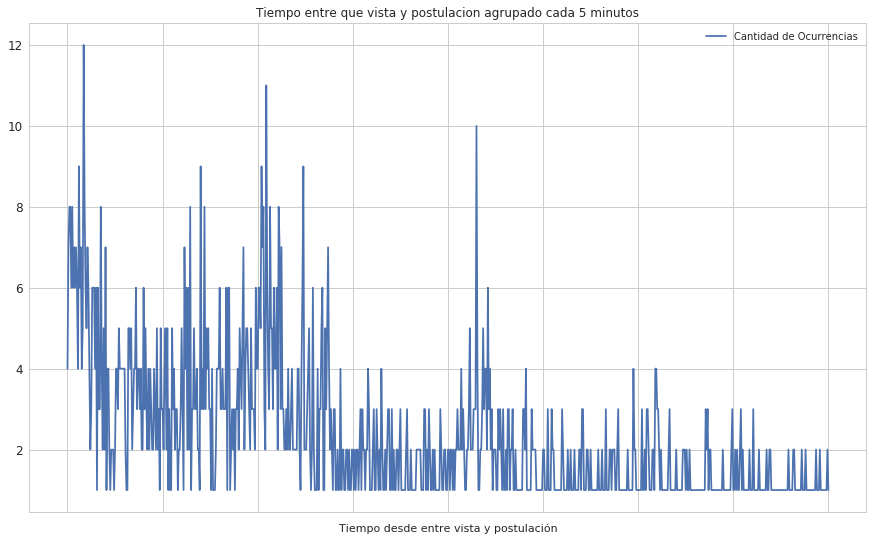

In [7]:
plt.figure(figsize = (40,10))
tmp.columns = [ 'Tiempo desde entre vista y postulación','Cantidad de Ocurrencias']
tmp.plot(x="Tiempo desde entre vista y postulación",y="Cantidad de Ocurrencias", title ="Tiempo entre que vista y postulacion agrupado cada 5 minutos", figsize=(15, 10), legend=True, fontsize=12)